# Cross-validation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target)

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
cross_val_score(KNeighborsClassifier(),
                X_train, y_train, cv=5)

array([0.98909091, 0.98897059, 0.98501873, 0.97752809, 0.97368421])

In [5]:
from sklearn.model_selection import KFold, RepeatedStratifiedKFold

In [6]:
cross_val_score(KNeighborsClassifier(),
                X_train, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42))

array([0.97037037, 0.97037037, 0.97777778, 0.97777778, 0.97777778,
       0.98518519, 0.99259259, 0.98507463, 0.99253731, 0.99253731])

In [7]:
cross_val_score(KNeighborsClassifier(),
                X_train, y_train,
                cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42))

array([0.97857143, 1.        , 0.99264706, 0.97794118, 0.97777778,
       0.96296296, 0.96992481, 0.98473282, 0.98473282, 1.        ,
       0.97142857, 0.99280576, 0.98529412, 1.        , 0.99259259,
       0.94814815, 0.98496241, 0.99236641, 0.97709924, 0.98473282,
       0.99285714, 0.98561151, 0.97058824, 0.97794118, 0.97777778,
       0.99259259, 0.97744361, 0.99236641, 0.97709924, 0.99236641,
       0.97142857, 0.99280576, 0.96323529, 0.99264706, 0.98518519,
       0.97777778, 0.96992481, 1.        , 1.        , 0.98473282,
       1.        , 0.98561151, 0.97058824, 0.97058824, 0.97777778,
       0.97777778, 0.9924812 , 0.97709924, 0.98473282, 0.98473282,
       0.99285714, 0.96402878, 0.97794118, 0.98529412, 0.97777778,
       1.        , 0.9924812 , 0.98473282, 0.97709924, 0.98473282,
       0.99285714, 0.98561151, 0.97794118, 0.98529412, 0.99259259,
       0.98518519, 0.96240602, 0.97709924, 1.        , 0.98473282,
       0.99285714, 0.98561151, 0.97794118, 0.98529412, 0.97777

Grid Searches
=================

Grid-Search with build-in cross validation

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Define parameter grid:

In [9]:
import numpy as np

param_grid = {'C': 10. ** np.arange(-3, 3),
              'gamma' : 10. ** np.arange(-5, 0)}

np.set_printoptions(suppress=True)
print(param_grid)

{'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]), 'gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])}


In [10]:
grid_search = GridSearchCV(SVC(), param_grid, verbose=3, cv=5)

A GridSearchCV object behaves just like a normal classifier.

In [11]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................ C=0.001, gamma=1e-05, score=0.105, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................ C=0.001, gamma=1e-05, score=0.107, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................ C=0.001, gamma=1e-05, score=0.105, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ................ C=0.001, gamma=1e-05, score=0.105, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ................ C=0.001, gamma=1e-05, score=0.105, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.105, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.107, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.105, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.105, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.105, total=   0.2s
[CV] C=0.001, gamma=0.001 ............................................
[CV] .

[CV] .................. C=0.1, gamma=0.001, score=0.966, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.948, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.944, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.105, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.107, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.105, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.105, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ................... C=10.0, gamma=0.1, score=0.107, total=   0.2s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.105, total=   0.2s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.105, total=   0.2s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.105, total=   0.2s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=1.000, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=0.985, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=0.981, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   21.5s finished
C:\Users\m.pejic\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]),
                         'gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [12]:
grid_search.predict(X_test)

array([7, 8, 1, 3, 7, 6, 9, 6, 8, 7, 5, 1, 7, 9, 2, 8, 1, 0, 5, 8, 1, 7,
       6, 1, 1, 4, 6, 5, 6, 7, 3, 2, 4, 2, 0, 5, 0, 3, 5, 5, 8, 3, 9, 4,
       4, 6, 6, 8, 3, 6, 7, 2, 1, 7, 9, 7, 9, 1, 4, 3, 9, 8, 0, 3, 4, 2,
       7, 2, 2, 6, 9, 0, 6, 0, 5, 9, 1, 1, 6, 8, 7, 5, 8, 3, 0, 5, 7, 2,
       3, 2, 7, 4, 2, 8, 7, 3, 4, 6, 2, 5, 0, 7, 2, 8, 8, 8, 4, 5, 1, 4,
       1, 7, 9, 3, 6, 6, 9, 1, 0, 8, 8, 0, 2, 0, 8, 1, 0, 4, 4, 5, 0, 5,
       3, 1, 0, 7, 3, 6, 1, 7, 3, 4, 1, 1, 6, 0, 6, 8, 4, 0, 3, 8, 5, 1,
       1, 5, 6, 4, 9, 2, 4, 2, 6, 8, 4, 1, 4, 3, 3, 9, 4, 2, 6, 4, 2, 8,
       9, 3, 5, 9, 7, 4, 2, 2, 3, 4, 1, 7, 3, 0, 0, 5, 5, 8, 9, 5, 0, 6,
       6, 7, 0, 0, 2, 5, 2, 7, 6, 5, 8, 2, 2, 4, 7, 3, 8, 0, 0, 7, 4, 3,
       5, 5, 3, 8, 8, 1, 5, 5, 4, 4, 0, 4, 7, 3, 4, 1, 9, 5, 3, 4, 2, 9,
       2, 4, 6, 8, 6, 7, 0, 2, 4, 8, 5, 6, 6, 9, 8, 9, 4, 5, 9, 2, 5, 4,
       2, 9, 6, 6, 9, 4, 7, 9, 9, 7, 3, 3, 5, 6, 9, 9, 1, 8, 0, 4, 2, 3,
       0, 5, 3, 9, 9, 7, 5, 9, 7, 0, 1, 9, 1, 6, 0,

In [13]:
grid_search.score(X_test, y_test)

0.9866666666666667

In [14]:
grid_search.best_params_

{'C': 1.0, 'gamma': 0.001}

In [15]:
grid_search.best_score_

0.9910913140311804

In [16]:
grid_search.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

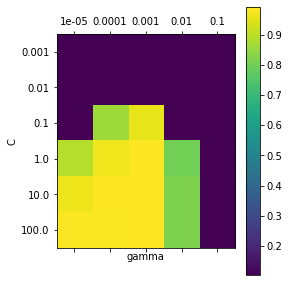

In [17]:
# We extract just the scores

scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(6, 5)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);

# Exercises
Use GridSearchCV to adjust n_neighbors of KNeighborsClassifier.

In [ ]:
# %load solutions/grid_search_k_neighbors.py

# Exercises - solution

In [22]:
# imports
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
# create param_grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 10, 20, 30, 50]}

In [24]:
# create GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, return_train_score=True, cv=5)

In [28]:
# training
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 10, 20, 30, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [30]:
# check best parameters (n_neighbors)
print('Best parameters = {}'.format(grid_search.best_params_))

Best parameters = {'n_neighbors': 1}


In [31]:
# accuracy with training and test set
print('Training set accuracy: {}'.format(grid_search.score(X_train, y_train)))
print('Test set accuracy: {}'.format(grid_search.score(X_test, y_test)))

Training set accuracy: 1.0
Test set accuracy: 0.9844444444444445


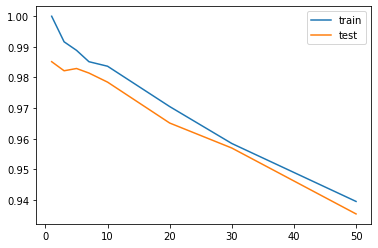

In [35]:
# plot Grid Search results (change of accuracy with change of n_neighbors, for training and test data)
results = grid_search.cv_results_
plt.plot(param_grid['n_neighbors'], results['mean_train_score'], label="train")
plt.plot(param_grid['n_neighbors'], results['mean_test_score'], label="test")
plt.legend()